## Quantum Tomography:
Write an iterative program for below problem statement: 

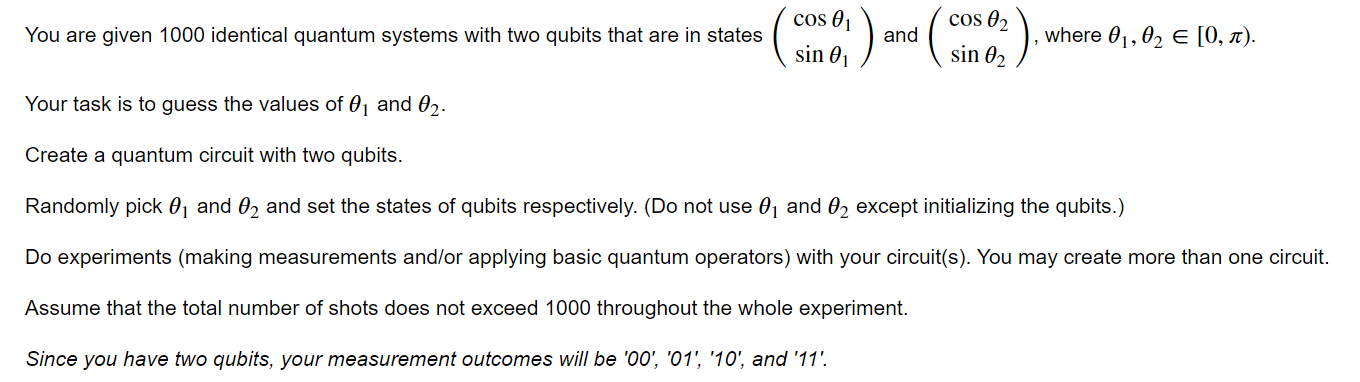

### Approach:

Given 

$ \vert q_0 \rangle = \begin{bmatrix} \cos\alpha \\ \sin\alpha \end{bmatrix} $
$ \vert q_1 \rangle = \begin{bmatrix} \cos\beta \\ \sin\beta \end{bmatrix}$


Therefore

$$
\vert q_0 \rangle  \otimes \vert q_1 \rangle = \begin{bmatrix} \cos\alpha \\ \sin\alpha \end{bmatrix} \otimes \begin{bmatrix} \cos\beta \\ \sin\beta \end{bmatrix} = 
\begin{bmatrix} \cos\alpha . \cos\beta \\ 
\cos\alpha . \sin\beta \\
\sin\alpha . \cos\beta \\
\sin\alpha . \sin\beta \\
\end{bmatrix} = \vert q_0q_1 \rangle
$$


Thus measurement probability should be: 
$$
P(\vert 00 \rangle) = \cos^2\alpha . \cos^2\beta = x\\ 
P(\vert 01 \rangle) = \cos^2\alpha . \sin^2\beta = y\\
P(\vert 10 \rangle) = \sin^2\alpha . \cos^2\beta = z \\
P(\vert 11 \rangle) = \sin^2\alpha . \sin^2\beta = w \\
$$



# Designing solution:


In [1]:
import numpy as np
import random
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram 

# Select two hidden, unknown angles => Initial States of 2 qubits
secret_theta1 = np.around(random.uniform(0,math.pi),2)
secret_theta2 = np.around(random.uniform(0,math.pi),2)

print("Secret or unknown Theta1: ", secret_theta1," Radians or ",(secret_theta1*180/math.pi)," Degrees") 
print("Secret or unknown Theta2: ", secret_theta2," Radians or ",(secret_theta2*180/math.pi)," Degrees")

# Prepare circuit
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q,c)
# apply rotations
qc.ry(2*secret_theta1,q[0])
qc.ry(2*secret_theta2,q[1])
qc.measure(q,c)
# Draw Circuit
#qc.draw("mpl")


Secret or unknown Theta1:  2.13  Radians or  122.04001036286535  Degrees
Secret or unknown Theta2:  0.27  Radians or  15.469860468532227  Degrees


In [2]:
# Execute Trial for 900 Shots
job = execute(experiments=qc, backend=Aer.get_backend("statevector_simulator"),shots=900)
counts = job.result().get_counts(qc)
print(counts)

{'00': 237, '01': 601, '11': 48, '10': 14}


In [3]:
# Titrations with 900 Shots
my_approximation_theta1 = 0
my_approximation_theta2 = 0

_00 = counts.get('00')
_01 = counts.get('01')
_10 = counts.get('10')
_11 = counts.get('11')

# WARNING: DIVIDE_BY_ZERO possible
# Tan pi/2 is Infynity 
# Tan inverse of Infinity is np.arctan(np.inf) = +/-pi/2
my_approximation_theta1 = 2 * np.arctan( np.sqrt(_10/_00) )
my_approximation_theta2 = 2 * np.arctan( np.sqrt(_01/_00) )

print("Approximation of Theta1: ",my_approximation_theta1," Radians == ",(my_approximation_theta1*180/math.pi))
print("Approximation of Theta2: ",my_approximation_theta2," Radians == ",(my_approximation_theta2*180/math.pi))

Approximation of Theta1:  0.4768476230807478  Radians ==  27.32135627337191
Approximation of Theta2:  2.020132327210318  Radians ==  115.74505640709226


In [4]:
job = execute(experiments=qc, backend=Aer.get_backend("statevector_simulator"),shots=100)
counts = job.result().get_counts(qc)
print(counts)
#plot_histogram(counts)

{'01': 74, '00': 23, '10': 2, '11': 1}
